In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the OCRLetter recognition dataset
dataset = fetch_openml(name='letter', version=1)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7


[25 15 18 ... 14 11 16]
Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 1.7696 - accuracy: 0.5104 - val_loss: 1.0193 - val_accuracy: 0.7095
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.8852 - accuracy: 0.7491 - val_loss: 0.7571 - val_accuracy: 0.7760
Epoch 3/20
500/500 [==============================] - 2s 3ms/step - loss: 0.6971 - accuracy: 0.8010 - val_loss: 0.6246 - val_accuracy: 0.8158
Epoch 4/20
500/500 [==============================] - 3s 5ms/step - loss: 0.5940 - accuracy: 0.8278 - val_loss: 0.5511 - val_accuracy: 0.8413
Epoch 5/20
500/500 [==============================] - 3s 7ms/step - loss: 0.5173 - accuracy: 0.8497 - val_loss: 0.4928 - val_accuracy: 0.8550
Epoch 6/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4619 - accuracy: 0.8651 - val_loss: 0.4504 - val_accuracy: 0.8612
Epoch 7/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8758 - val_loss: 0.4132 - val

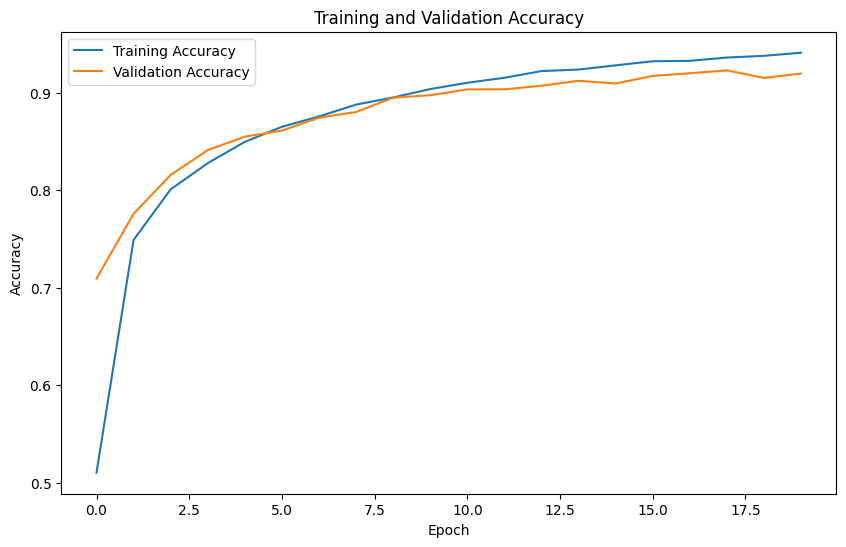

125/125 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9197
Test Loss: 0.25113192200660706
Test Accuracy: 0.9197499752044678


In [8]:
# dataset.data.head()
# dataset.target.head()
# print(dataset.data)

# Split the dataset into features and target
X = dataset.data
y = dataset.target

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
